### Aug 11, 13:  Calculus and the Complex Plane

We have many versions of high school math, this "mixed with programming" approach being one of them.  

Or rather, "mixing with programming" is a possibility many pathways through this space have and/or will incorporate.

Most versions of high school math include some amount of Delta Calculus, which first takes root in Newton's introduction of "fluxions" to the language (his *Method of Fluxions* was completed in 1671, and published in 1736).

In Python world, we would conventionally use [Sage](https://www.sagemath.org/) in the cloud, or get by with a less ambitious set of local modules, such as we find through the Anaconda distribution.

In this curriculum, we take the latter approach, using a combination of Standard Library modules, numpy, pandas and [sympy](CAS_Python.ipynb).

In [1]:
# from Standard Library

import math
import cmath

In [2]:
z = 1 + 4j
z

(1+4j)

In [3]:
z.real

1.0

In [4]:
z.imag

4.0

In [5]:
z1 = complex(3, 4)
z1

(3+4j)

In [6]:
math.sqrt(3**2 + 4**2)

5.0

In [7]:
r, theta = cmath.polar(z1)

In [8]:
theta

0.9272952180016122

In [9]:
math.degrees(theta)

53.13010235415598

### Differentiation

The cell below encapsulates an approximation of what it means to "take the derivative of f".  

The D function properly expects a function as input, and returns a corresponding function as output.

What the output function does is "wiggle x" just a tiny bit to get a read on the resulting change.  

Change at x, per wiggle (x+h), is what the new function, the derivative function, computes. 

h is miniscule, here 0.00000001.  That's what makes our implementation of D "approximate": h is not truly infinitessimal.  "It's close enough for folk music" we sometimes say.

In [10]:
def D(f, h=1e-8):
    def d(x):
        return (f(x+h)-f(x))/h
    return d

Lets take the 2nd power function, which plots as a parabola, as in ["parabolic dish"](https://duckduckgo.com/?q=parabolic+dish&atb=v250-5__&iax=images&ia=images), a device for reflecting incoming "invisible light" (such as TV programs) from satellites, to a common "focus" held in front of the dish.

In [11]:
def pow2(x):
    return x * x

Now lets run ```pow2``` through our D function, to get back another function.  This new function will talk about "how much wiggle" at each x.  See below.

In [12]:
diff_pow2 = D(pow2)

In [13]:
diff_pow2.__name__

'd'

In [14]:
# 3rd party workhorses

import numpy as np
import pandas as pd

In [15]:
domain = np.linspace(-5, 5, 400)

In [16]:
table = pd.DataFrame(
           {'x'   : domain, 
            'pow2': [pow2(x) for x in domain], 
            'diff': [diff_pow2(x) for x in domain]})

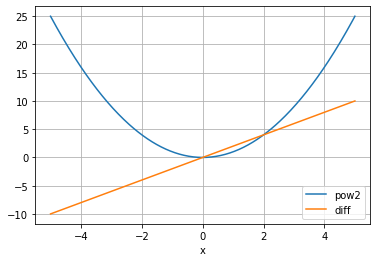

In [17]:
table.plot(x='x', grid=True);

What does the above plot reveal?

In blue, we see the original parabola.  The horizontal axis shows the domain, from -5 to 5.  

Of course you're free to alter these values as you interact with your Notebook.

The orange line traces the amount of change at each point, which corresponds to the "slope" or "steepness" of the original blue curve.  

The blue curve starts steeply down, levels off, and goes more steeply up.  Therefore the slope starts at -10 (steeply down), passes through zero (levels off), and climbs steadily (steeply up) to positive 10.

The orange line is straight and itself has a slope of 2.  

So we see the derivative of a parabola is a line, showing slope going from negative to positive at this steady rate of of increase.

Lets use our new tool, D, to investigate the function 

$$y = e^{x}$$  

What's so special about it?

In [18]:
def e(x):
    return math.e ** x

In [19]:
diff_ex = D(e)

In [20]:
table = pd.DataFrame(
           {'x'   : domain, 
            'diff_ex': [diff_ex(x) for x in domain]})

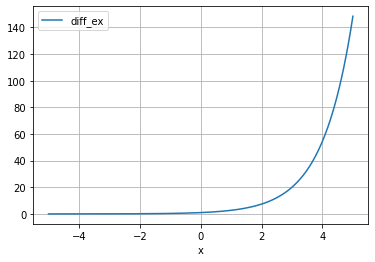

In [21]:
table.plot(x='x', grid=True);

What to observe is the plot of the original and its derivative are identical.

The $e^{x}$ function graphs its own slope one could say.  

It starts almost zero (perfectly flat) and then by x=0, it has grown to 1, and the steepness increases ever more steeply after that. 

In [22]:
table = pd.DataFrame(
           {'x'   : domain, 
            'ex': [e(x) for x in domain]})

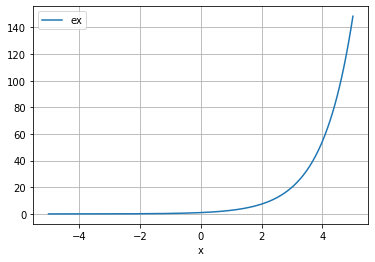

In [23]:
table.plot(x='x', grid=True);

When learning calculus notation, you will likely want to consult [$\LaTeX$ documentation](https://math-linux.com/latex-26/faq/latex-faq/article/latex-derivatives-limits-sums-products-and-integrals) from time to time.

What's a sympy approach to this same topic?  Remember sympy is able to use $\LaTeX$ for output.

In [24]:
from sympy import Derivative, Integral, exp, log
from sympy import symbols
x = symbols('x')
d=Derivative(exp(x)) 
d

Derivative(exp(x), x)

Above is some formal notation expressing the derivative of the $e^{x}$ function.  When we actually take the derivative (below) we get back the original function.

Again, this is special to $e^{x}$.  The number $e$ is defined to give us an exponential function that is its own deriviative.

In [25]:
d.doit()

exp(x)

How about our earlier function, ```pow2```?  Lets put it through the same steps and see what what we get.

In [26]:
d=Derivative(x**2) 
d

Derivative(x**2, x)

In [27]:
d.doit()

2*x

In [28]:
math.e

2.718281828459045

In [29]:
math.pi

3.141592653589793

In [30]:
phi =  (1 + math.sqrt(5))/2
phi

1.618033988749895

In [31]:
cmath.sqrt(-5)

2.23606797749979j

### Integration

The inverse of Differentiation, is Integration.  Let's define another approximation function, that takes a function and returns a function.  Let's call it S for Sum.

What Sum does is accumulate the area of miniscule rectangles of base h and height $f(x)$.  

How much total area has a curve defined, from some starting position up to some current position x?

In [32]:
def S(f, h=1e-2):
    def s(start, x):
        domain = np.arange(start, x, h)
        return sum([f(x)*h for x in domain])
    return s

In [33]:
def diff(x):
    return 2*x

In [34]:
int_2x = S(diff)

In [35]:
domain = np.linspace(-5, 5, 100)

In [36]:
table = pd.DataFrame(
           {'x'     : domain, 
            '2x'  : [diff(x) for x in domain],
            'int_2x': [int_2x(-5, x) for x in domain]})

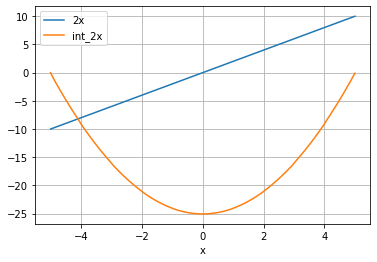

In [37]:
table.plot(x='x', grid=True);

This time the straight positively sloping line is what's driving the corresponding integral to be a parabola.  

The area defined by the straight line starts out  negative, and reaches -25, a minimum, at x=0. 

However the new negative area is added at a diminishing rate as the line approaches x=0, so the orange curve descendes ever more slowly. 

Then, as x goes positive, positive area accumulates, not at a constant rate but faster and faster.  

The integral swoops up, for a net area of 0 in this case.

In [38]:
s = Integral(2*x) 
s

Integral(2*x, x)

In [39]:
s.doit()

x**2

In [40]:
int_ex = S(lambda x: math.e**x)

In [41]:
table = pd.DataFrame(
           {'x'   : domain, 
            'int_ex': [int_ex(-5, x) for x in domain]})

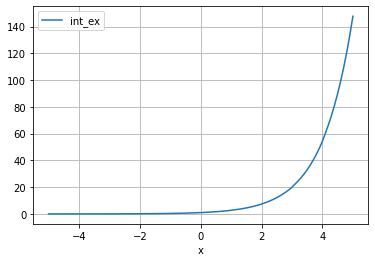

In [42]:
table.plot(x='x', grid=True);

In [43]:
s = Integral(exp(x)) 
s

Integral(exp(x), x)

In [44]:
s.doit()

exp(x)

Remember Pascal's Triangle, and our binomial distribution?  The continuous version of the discrete binomial distribution is called the normal distribution, or the bell curve.

Data Science anchors to the normal distribution in many ways.  When the total area under the bell curve, or any curve, equals 1, we may used it as a probability finder.  The probability of a value occurring between $x_{0}$ and $x_{1}$ is the area under the curve between these two values.

Remember balls falling in the Galton board?  Chances of being in the middle are high, and taper off towards each end.

In [45]:
def bell_curve(x):
    return (1/math.sqrt(2*math.pi)) * pow(math.e, -x**2/2 )

In [46]:
domain = np.linspace(-5, 5, 100)

table = pd.DataFrame(
           {'x'   : domain, 
            'pdf': [bell_curve(x) for x in domain]})

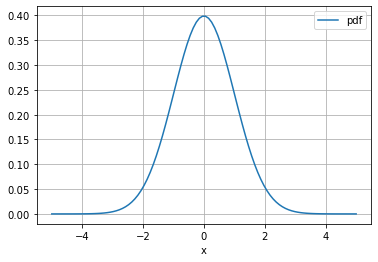

In [47]:
table.plot(x='x', grid=True);

In [48]:
int_bell = S(bell_curve)

As you begin your studies in Data Science, you'll find "probability density function" (PDF) is another name for the normal distribution.  "Cumulative density function" (CDF) is another name for its integral.

In [49]:
table = pd.DataFrame(
        {'x' : domain, 
        'pdf': [bell_curve(x) for x in domain],
        'cdf': [int_bell(-5, x) for x in domain]})

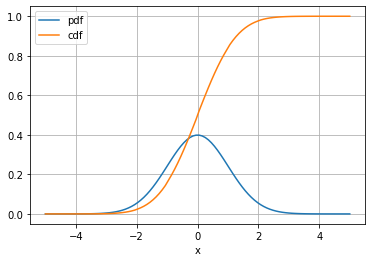

In [50]:
table.plot(x='x', grid=True);

The orange curve shows the growing probability of events along a bell curve.  Events on the far left are improbable, but improbabilities add up (think of the integral) and by the time we get to 0, the average, half of the events are to the left, the other half to the right.

The orange curve grows most quickly in the middle of its life, and tapers off again as it approach 1 exactly i.e. all possibilities are accounted for as the area under the curve fills to completion.

Let's see what sympy does if we ask it to integrate the above function, the PDF as we call it in data science, to get the corresponding CDF (the PDF's integral).

In [51]:
s = Integral((1/math.sqrt(2*math.pi)) * pow(math.e, -x**2/2 ))
s

Integral(0.398942280401433*2.71828182845905**(-x**2/2), x)

In [52]:
s.doit()

0.398942280401433*Integral(2.71828182845905**(-x**2/2), x)

It didn't really do it.  It simplified best as it could.

Here's more information about integrating the Normal Distribution on [Mathematics StackExchange](https://math.stackexchange.com/questions/145087/how-to-calculate-the-integral-in-normal-distribution).

### Complex Numbers

Complex numbers give us a concise way of plotting points on a plane, using a pair of crossed axes.  We call one axis real, and one imaginary.  Python has complex numbers built in.

In [53]:
one = complex(1, 0)

In [54]:
# help(one)

In [55]:
import cmath

In [56]:
print(dir(cmath))

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atanh', 'cos', 'cosh', 'e', 'exp', 'inf', 'infj', 'isclose', 'isfinite', 'isinf', 'isnan', 'log', 'log10', 'nan', 'nanj', 'phase', 'pi', 'polar', 'rect', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau']


In high school math, we plot points (x, y) on a Cartesian plane with crossed axes.  Both axes represent the "real numbers".

Then, using those new skills, we swap out one of the real axes, for an imaginary axis, meaning it's now in units of $\sqrt{-1}$, which we all appreciate is not a real number.

In [57]:
cmath.sqrt(-1)

1j

In [58]:
(2 + 2j) * (1 + 3j)

(-4+8j)

In [59]:
? cmath.polar

Signature:  cmath.polar(z, /)
Docstring:
Convert a complex from rectangular coordinates to polar coordinates.

r is the distance from 0 and phi the phase angle.
Type:      builtin_function_or_method


In [60]:
? cmath.rect

Signature:  cmath.rect(r, phi, /)
Docstring: Convert from polar coordinates to rectangular coordinates.
Type:      builtin_function_or_method


In [61]:
def cmul(c0, c1):
    """
    multiplying two complex numbers c0, c1
    by multiplying radii and adding their 
    angles"""
    r0, theta0 = cmath.polar(c0)
    r1, theta1 = cmath.polar(c1)
    return cmath.rect(r0 * r1, theta0 + theta1)

In [62]:
cmul((2 + 2j) , (1 + 3j))

(-4+8j)

In [63]:
cmath.polar(one)

(1.0, 0.0)

Picture an arrow, like a clock hand, pointing to (1, 1) on a Cartesian plane, except the vertical axis is in units of 1j instead of just 1.  

In Python, we use $a + bj$ to express complex numbers, where any a, b are any int or floating point value.

In [64]:
one_one = complex(1, 1)

In [65]:
r, theta = cmath.polar(one_one)
r, theta

(1.4142135623730951, 0.7853981633974483)

$r$ above is the hypotenuse of a right triangle with edges 1, i.e. is $\sqrt{2}$.  

Since the legs of the triangle are both the same length, we expect an angle of 45 degrees, but we're getting theta in radians.  We may convert radians to degrees.

In [66]:
from math import degrees, radians

In [67]:
radians(90)

1.5707963267948966

In [68]:
degrees(cmath.pi)

180.0

In [69]:
degrees(theta)

45.0

Our favorite number $e$ now comes back into focus as we're able to make a "clock hand" rotate counter-clockwise by theta, simply by raising $e$ to 1j * theta.

$$
point = e^{i \theta}
$$

Lets see...

In [70]:
theta = radians(45) # degrees to radians
point = pow(cmath.e, 1j * theta)
point

(0.7071067811865476+0.7071067811865475j)

In [71]:
r, theta = cmath.polar(point)
r, theta

(1.0, 0.7853981633974482)

The hypotenuse is always 1, whereas we have control over theta.  Lets draw a circle using an x,y scatterplot.

In [72]:
rads   = np.linspace(0, 2*math.pi, 360)
points = pd.DataFrame({
    'x': [pow(cmath.e, 1j*theta).real for theta in rads],
    'y': [pow(cmath.e, 1j*theta).imag for theta in rads],
})

In [73]:
points.head()

,x,y
0,1.000000,0.000000
1,0.999847,0.017501
2,0.999387,0.034997
3,0.998622,0.052482
4,0.997550,0.069950


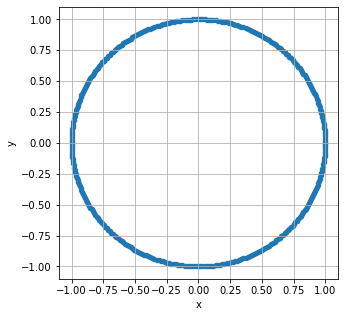

In [74]:
points.plot.scatter('x', 'y', grid=True, 
                    figsize=(5,5));

What's the inverse of $f(x) = e^{x}$?  It would start with a target y value and answer the question:  what $x$ must I raise $e$ to, to get y?  

For example, reading off the plot, it looks like if we want y = 20, we need our x to be about 3.

In [75]:
math.e ** 3

20.085536923187664

That's close, but what's a more exact answer?  This is where the math.log function comes in, the inverse of math.exp.

This log is to the base e by default, although a 2nd optional positional argument may be used to override that.

In [76]:
? math.log

Docstring:
log(x, [base=math.e])
Return the logarithm of x to the given base.

If the base not specified, returns the natural logarithm (base e) of x.
Type:      builtin_function_or_method


In [77]:
math.log(20)

2.995732273553991

In [78]:
math.log(20, 10)

1.301029995663981

In [79]:
math.log10(20)  # alternatively, for base 10

1.3010299956639813

#### Back to Calculus

Lets plot the inverse function of $f(x) = e^{x}$, which will only have positive targets, since we have no way of reaching negatives using powering.

In [80]:
domain = np.linspace(0, 100, 200)

table = pd.DataFrame(
           {'x'   : domain[1:], 
            'logx': [math.log(x) for x in domain[1:]]})

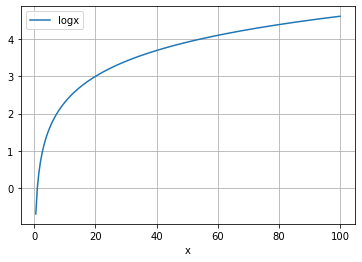

In [81]:
table.plot(x='x', grid=True);

Think about the slope of this thing.  It starts out almost vertical, highly positive, when x is tiny, then levels off more and more, decreasing to 1,  approaching 0.  

What function is like this?  What is the derivative of $\log{x}$?

In [82]:
x = symbols('x')
d=Derivative(log(x)) 
d

Derivative(log(x), x)

In [83]:
d.doit()

1/x

Again, we can use of D function to "measure the wiggle" (change size) around each x.

In [84]:
dlog = D(math.log)

In [85]:
table = pd.DataFrame(
           {'x'   : domain[1:], 
            'dlog': [dlog(y) for y in domain[1:]]})

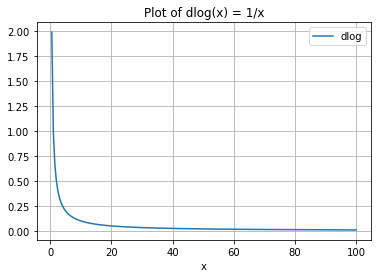

In [86]:
table.plot(x='x', grid=True, title="Plot of dlog(x) = 1/x");

So if we integrate $1/x$ do we get back to $\log{x}$?  You betcha we do.

In [87]:
x = symbols('x')
s=Integral(x**-1) 
s

Integral(1/x, x)

In [88]:
s.doit()

log(x)

Or lets use S, our approximation, to integrate the function:

$$
f(x) = 1/x
$$

In [89]:
int_f = S(lambda x: 1/x)  # needs to be a callable

In [90]:
domain = np.arange(0.1, 3, 0.01)

table = pd.DataFrame(
           {'x'     : domain[1:], 
            '1/x'   : [1/x for x in domain[1:]],
            'int_f' : [int_f(0.01, x) for x in domain[1:]]})

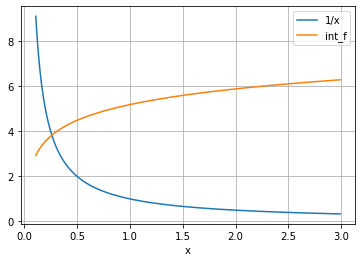

In [91]:
table.plot(x='x', grid=True);

With this introduction, we're ready to tie everything together using [Euler's Formula](Trig.ipynb).